In [8]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import os
import seaborn as sns
import pandas as pd


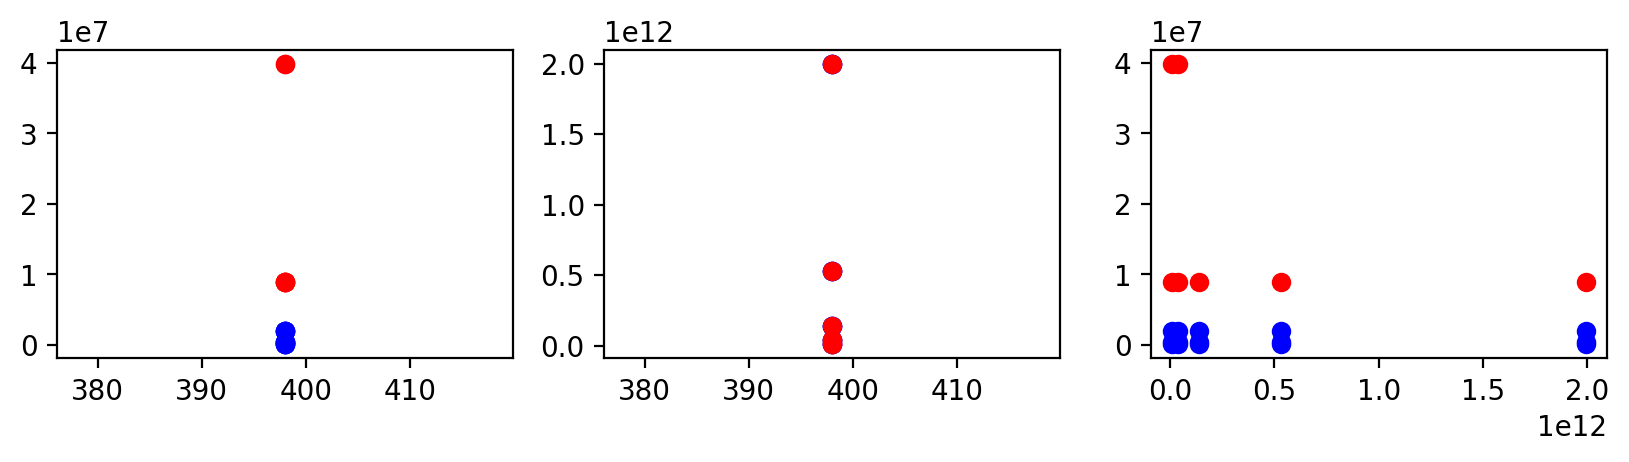

In [31]:


no_merger_Re = []
no_merger_GC = []
no_merger_halo = []

max_no_merger_masses = []

merger_Re = []
merger_GC = []
merger_halo = []

max_merger_masses = []

merger_num = []
merger_num_plot = []

std_masses = []
number_of_mergers = []
all_Res = []
all_GCs = []
all_halos = []

# #NFW 1 values
#rounded values:

num  = 5
#uniform param distributions:
R_es = np.linspace(2.6, 4, num)  #log Re in pc
R_es = 10**R_es/1000 # Re in kpc
GC_masses = np.linspace(5, 7.6, num)  #log Re in solar masses 
GC_masses = 10**GC_masses/10**5 #Re in 10^5 solar masses
halo_masses = halo_masses = np.linspace(10, 12.3, num) #log DM M in solar masses
halo_masses = 10**halo_masses #DM M in solar masses

all_Re = []
all_GC = []
all_halo = []

# for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses): #iterate through every combo of Re, total GC mass, DM halo mass
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    R_e = round(R_e, 3)
    GC_mass = round(GC_mass, 3)
    halo_mass = round(halo_mass, 1)
    # open final time file
    file_name0 = 'Sim_NFW_0_'+str(R_e)+'_'+str(GC_mass)+'_'+str(halo_mass)+'.txt'  #initial
    file_name20 = 'Sim_NFW_20_'+str(R_e)+'_'+str(GC_mass)+'_'+str(halo_mass)+'.txt' #final 
    path_name = '/home/vk9342/spring2024research/test_sim_run_M9/'
    file = str(path_name) + str(file_name20)

    if os.path.exists(file):
        
        
        data_initial = np.genfromtxt('/home/vk9342/spring2024research/test_sim_run_M9/'+str(file_name0), skip_header=2)  
        data_final = np.genfromtxt('/home/vk9342/spring2024research/test_sim_run_M9/'+str(file_name20), skip_header=2)
    
        iteration_initial = data_initial [:, 0]
        iteration_final = data_final [:, 0]
        all_masses_initial = data_initial [:, 1]     #all initial masses from every iteration for a certain combination params
        all_masses_final = data_final [:, 1]

        all_Re.append(R_e)
        all_GC.append(GC_mass)
        all_halo.append(halo_mass)
    
        t = 0
        initial_masses = []
        initial_num_masses = []
        while t<10: #number of iteration 
            for k in range (len(iteration_initial)):
                    if iteration_initial[k] == t:
                        initial_masses.append (all_masses_initial[k])   #all initial masses from iteration t, clears at the end of every t value
            initial_num_masses.append(len(initial_masses)) #number of masses for iteration t
            initial_masses = []
            t = t+1
    
    
        t = 0
        final_masses = []
        final_num_masses = []
        max_masses = []
        while t<10:
            for k in range (len(iteration_final)):
                if iteration_final[k] == t:
                    final_masses.append (all_masses_final[k])   
            final_num_masses.append(len(final_masses))
            max_masses.append(max(final_masses))
            final_masses = []
            t = t+1
            
            
    
        max_mass = sum(max_masses)/len(max_masses)
        num_mergers = []
        for i in range (10):
            num_mergers.append (initial_num_masses[i] - final_num_masses[i])
        avg_num_mergers = sum(num_mergers)/len(num_mergers)
    
        median_num_mergers = statistics.median(num_mergers)
        median_max_mass = statistics.median(max_masses)
        std_num = np.std(num_mergers)
        std_mass = np.std(max_masses)
        std_masses.append (std_mass)
    
        #f.write (str(R_e)+ ' ' +str(n)+ ' ' +str(avg_num_mergers)+' ' +str(max_mass)+ ' ' +str(median_num_mergers)+ ' ' +str(median_max_mass)+ ' '+str(stand_dev_num)+' '+str(stand_dev_mass)+'\n')        
    
    # add simulation (params) to no merger and merger arrays     
        if avg_num_mergers >=1 and max_mass > 20:
            merger_Re.append(R_e*1000)
            merger_GC.append(GC_mass*10**5)
            merger_halo.append(halo_mass)
            max_merger_masses.append (max_mass)
            merger_num.append(avg_num_mergers)
        
        else:
            no_merger_Re.append(R_e*1000)
            no_merger_GC.append(GC_mass*10**5)
            no_merger_halo.append(halo_mass)
            max_no_merger_masses.append (max_mass)

            
    # else:
    #     print('file not found')


################
fig, axs = plt.subplots(ncols=3, nrows=1, figsize = (10, 2))
axs[0].scatter(no_merger_Re, no_merger_GC, color = 'blue')
axs[0].scatter(merger_Re, merger_GC, color = 'red')
# axs[0].set_xlim()
# axs[].set_ylim()
# axs[0].set_xlabel('Re (kpc)', fontsize=15)
# axs[0].set_ylabel('GC Mass ($10^5 M_\odot\$)', fontsize=15)                

axs[1].scatter(no_merger_Re, no_merger_halo, color = 'blue')
axs[1].scatter(merger_Re, merger_halo, color = 'red')
# axs[1].set_xlim()
# axs[1].set_ylim()
# axs[1].set_xlabel('Re (kpc)', fontsize=15)
# axs[1].set_ylabel('DM Halo Mass ($M_\odot\$)', fontsize=15) 

axs[2].scatter(no_merger_halo, no_merger_GC, color = 'blue')
axs[2].scatter(merger_halo, merger_GC, color = 'red')
# axs[2].set_xlim(0, 3.5)
# axs[2].set_ylim(0, 45)
# axs[2].set_xlabel('Re (kpc)', fontsize=15)
# axs[2].set_ylabel('DM Halo Mass ($M_\odot\$)', fontsize=15)

plt.show()







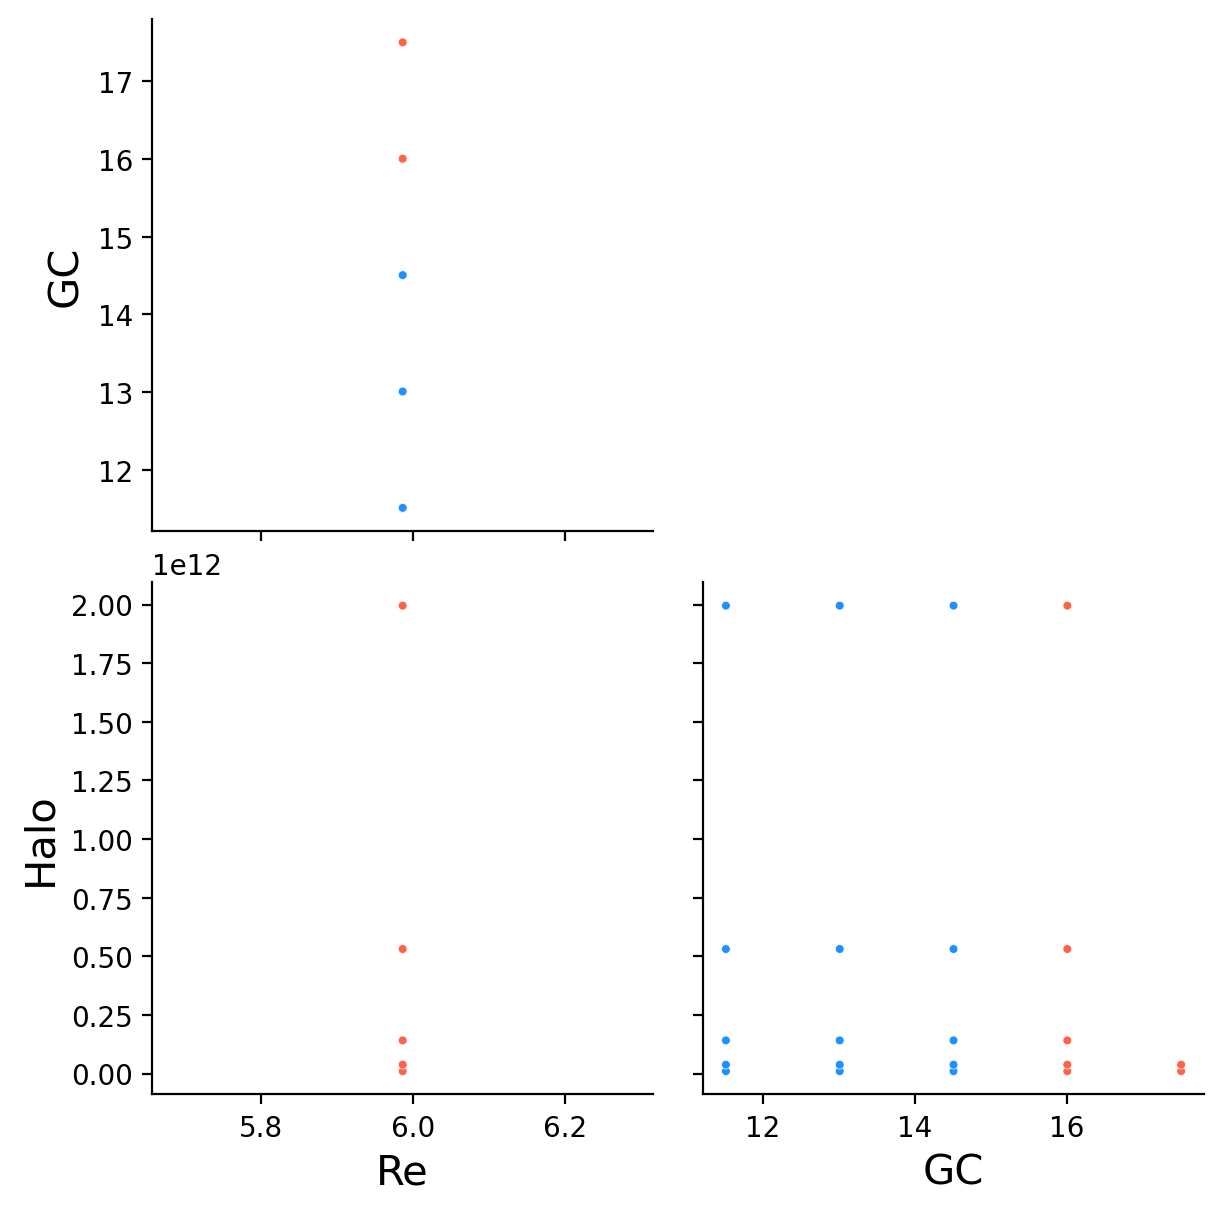

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

# Example data
data1 = pd.DataFrame({
    'Re': np.log(merger_Re),
    'GC': np.log(merger_GC),
    'Halo': merger_halo,
    'Type': ['GC merger'] * len(merger_Re)})

data2 = pd.DataFrame({
    'Re': np.log(no_merger_Re),
    'GC': np.log(no_merger_GC),
    'Halo': no_merger_halo,
    'Type': ['no GC mergers'] * len(no_merger_Re)})
combined_data = pd.concat([data2, data1])


# plt.figure(figsize=(20, 20))

g = sns.PairGrid(combined_data, hue='Type', corner = True, palette = ['dodgerblue', 'tomato'], height=3)
g.map(sns.scatterplot, s = 10, alpha = 1)
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, y_var in enumerate(g.y_vars):
    for j, x_var in enumerate(g.x_vars):
        if x_var == y_var:
            g.axes[i, j].set_visible(False)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.xaxis.label.set_size(15)  # Adjust x-axis label size
        ax.yaxis.label.set_size(15)  # Adjust y-axis label size


# g.add_legend(loc='center')
# plt.savefig('grid_plot_1.png')
plt.show()

# plt.figure()
# plt.scatter(merger_Re, merger_halo, c = 'r')
# plt.scatter(no_merger_Re, no_merger_halo, c = 'b')

# plt.figure()
# plt.scatter(no_merger_Re, no_merger_halo, color = 'blue', alpha = 0.2, s = 3)
# plt.scatter(merger_Re, merger_halo, color = 'red', alpha = 0.2, s = 3)

# plt.show



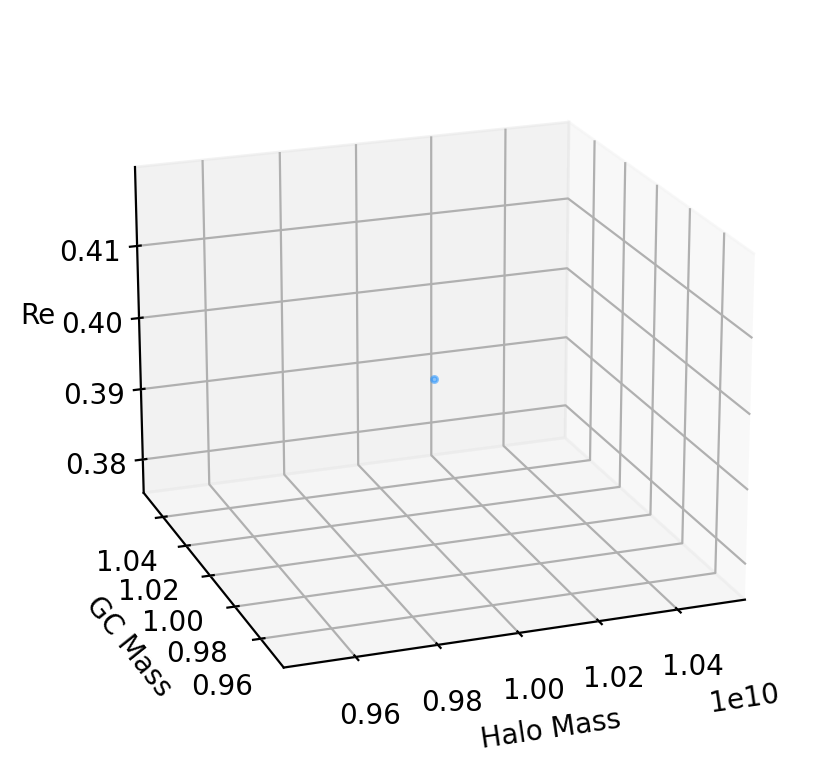

0.398


In [6]:
import numpy as np

Re = np.concatenate([merger_Re, no_merger_Re])
GC_masses = np.concatenate([merger_GC, no_merger_GC])
halo_masses = np.concatenate([merger_halo, no_merger_halo])
mergers = np.concatenate([np.ones(len(merger_Re)), np.zeros(len(no_merger_Re))])  # 1 for merger, 0 for no merger
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['tomato' if m == 1 else 'dodgerblue' for m in mergers]

ax.scatter(halo_masses, GC_masses, Re, c=colors, alpha = 0.5, s = 5)
# ax.set_xlim(1.5, 1.7)
ax.set_zlabel('Re')
ax.set_ylabel('GC Mass')
ax.set_xlabel('Halo Mass')

ax.view_init(elev=20, azim=250)

plt.savefig('3d_grid_plot1.png')

plt.show()



import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(max(no_merger_Re))

In [72]:
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools



# Start timer
start_time = time.time()

# Collect all data points
R_e_values = []
GC_mass_values = []
halo_mass_values = []

for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    R_e_values.append(R_e)
    GC_mass_values.append(GC_mass)
    halo_mass_values.append(halo_mass)




In [73]:
# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R_e_values, GC_mass_values, halo_mass_values, c='dodgerblue', alpha=0.5, s=5)

ax.set_xlabel('Re')
ax.set_ylabel('GC Mass')
ax.set_zlabel('Halo Mass')

ax.view_init(elev=30, azim=240)

# End timer before rendering
end_time = time.time()

# Calculate time taken
execution_time = end_time - start_time

print(f"Time taken to execute loop: {execution_time} seconds")

# Show plot
plt.show()

print(max(R_e_values))

Time taken to execute loop: 1.8636603355407715 seconds


KeyboardInterrupt: 

In [1]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools
import os
import seaborn as sns
import pandas as pd

In [ ]:
from plot_data import * 
R_es =[1.532, 2.903, 0.744, 1.189, 2.11, 0.984, 1.0, 1.43, 1.568, 0.885, 3.175, 0.824, 0.635, 
       1.053, 3.477, 1.476, 1.612, 1.426, 1.707, 1.393]
GC_masses = [7.876, 17.795, 19.198, 5.759, 11.169, 16.128, 7.685, 5.52, 42.089, 22.005, 3.894, 
             12.214, 4.615, 25.891, 32.22, 18.812, 27.726, 10.281, 6.34, 38.222]
halo_masses = [93272614300.0, 26248893900.0, 256044812000.0, 68832768300.0, 174653093000.0, 
               103838141000.0, 362040398000.0, 71485095600.0, 133619820000.0, 46835359900.0, 
               19338237200.0, 167265950000.0, 45378628700.0, 36800925900.0, 123862238000.0, 
               73476106800.0, 32197560900.0, 327226465000.0, 150636807000.0, 7548859220.0]




Re = []
GC = []
halo = []
for R_e, GC_mass, halo_mass in itertools.product(R_es, GC_masses, halo_masses):
    file_name20 = 'Sim_NFW_20_'+str(R_e)+'_'+str(GC_mass)+'_'+str(halo_mass)+'.txt' #final 
    path_name = '/home/vk9342/spring2024research/test_sim_run_1/'
    file = str(path_name) + str(file_name20)
    if os.path.exists(file):
        Re.append(R_e)
        GC.append(GC_mass)
        halo.append(halo_mass)

merger_Re, no_merger_Re, merger_GC, no_merger_GC, merger_halo, no_merger_halo = does_have_merger (R_es = Re, GC_masses = GC, halo_masses = halo, num_iters = 10)



/home/vk9342/.conda/envs/gcfriction/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vk9342/.conda/envs/gcfriction/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vk9342/.conda/envs/gcfriction/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vk9342/.conda/envs/gcfriction/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  func(x=x, y=y, **kwargs)
/home/vk9342/.conda/envs/gcfriction/lib/python3.7/site-packages/seaborn/axisgrid.py:1609: UserWarning: The palette list has more values (2) than needed (1),

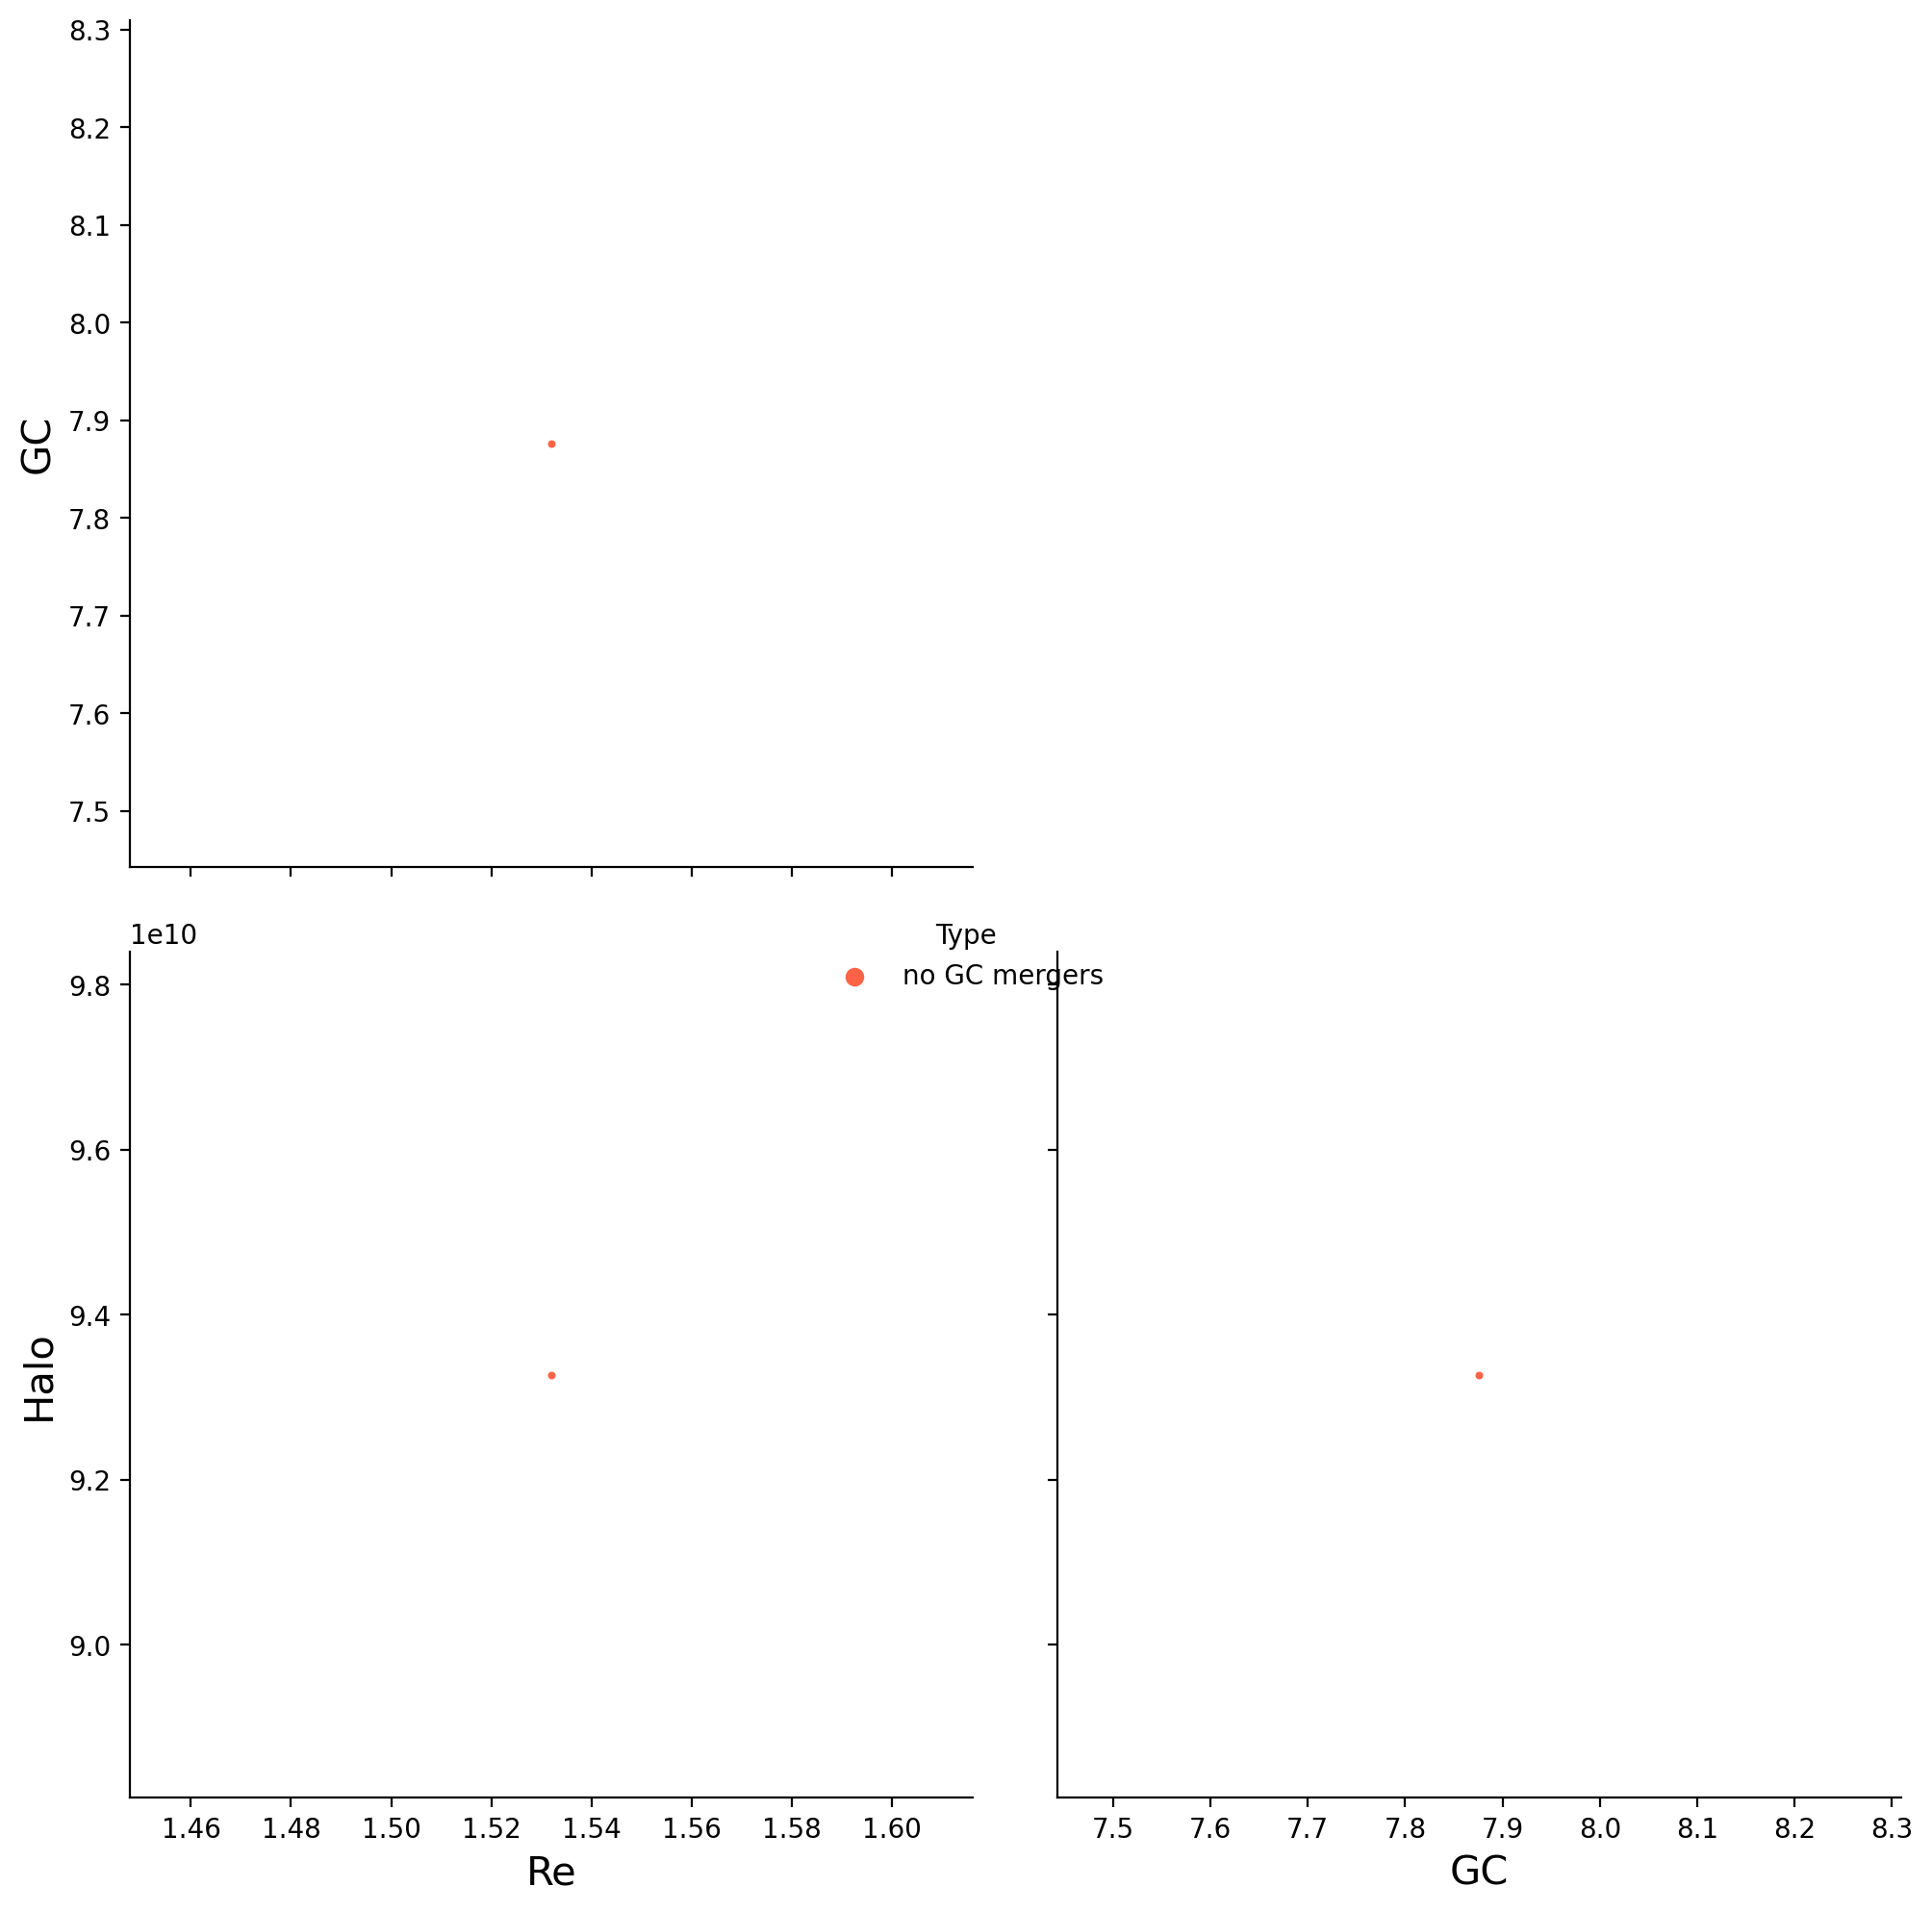

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

# Example data
data1 = pd.DataFrame({
    'Re': merger_Re,
    'GC': merger_GC,
    'Halo': merger_halo,
    'Type': ['GC merger'] * len(merger_Re)})

data2 = pd.DataFrame({
    'Re': no_merger_Re,
    'GC': no_merger_GC,
    'Halo': no_merger_halo,
    'Type': ['no GC mergers'] * len(no_merger_Re)})
combined_data = pd.concat([data1, data2])


# plt.figure(figsize=(20, 20))

g = sns.PairGrid(combined_data, hue='Type', corner = True, palette = ['tomato', 'dodgerblue'], height=5)
g.map(sns.scatterplot, s = 10)
g.fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, y_var in enumerate(g.y_vars):
    for j, x_var in enumerate(g.x_vars):
        if x_var == y_var:
            g.axes[i, j].set_visible(False)

for ax in g.axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.xaxis.label.set_size(15)  # Adjust x-axis label size
        ax.yaxis.label.set_size(15)  # Adjust y-axis label size


g.add_legend(loc='center')
plt.savefig('grid_plot_1.png')
plt.show()


In [ ]:
R_es =[1.532, 2.903, 0.744, 1.189, 2.11, 0.984, 1.0, 1.43, 1.568, 0.885, 3.175, 0.824, 0.635, 
       1.053, 3.477, 1.476, 1.612, 1.426, 1.707, 1.393]
GC_masses = [7.876, 17.795, 19.198, 5.759, 11.169, 16.128, 7.685, 5.52, 42.089, 22.005, 3.894, 
             12.214, 4.615, 25.891, 32.22, 18.812, 27.726, 10.281, 6.34, 38.222]
halo_masses = [93272614300.0, 26248893900.0, 256044812000.0, 68832768300.0, 174653093000.0, 
               103838141000.0, 362040398000.0, 71485095600.0, 133619820000.0, 46835359900.0, 
               19338237200.0, 167265950000.0, 45378628700.0, 36800925900.0, 123862238000.0, 
               73476106800.0, 32197560900.0, 327226465000.0, 150636807000.0, 7548859220.0]
axs = does_have_merger (R_es, GC_masses, halo_masses, 10)
plt.show